<a href="https://colab.research.google.com/github/SK-Faizan-Nasir/Spam-Mail-Detection/blob/main/Spam_mail_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Specifying the path of the dataset and then reading it

In [84]:

path='/content/drive/My Drive/Projects/Spam mail prediction Capstone Project/spamham.csv'
data=pd.read_csv(path)


## First 20 Rows

In [85]:
data.head(20)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


### Since ML models work better with numbers so changing labels
> 0-Ham Mail
> 1-Spam Mail

In [86]:
classlabel=[]
for i in data['Category'].values:
  if i=='spam':
    classlabel.append(1)
  else:
    classlabel.append(0)
classlabel=pd.Series(classlabel)

In [87]:
classlabel

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Length: 5572, dtype: int64

## Replacing Categories with our numerical labels

In [88]:
data.replace(data['Category'].values,classlabel,inplace=True)

In [89]:
data.head(20)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


### Checking for null values and filling it with empty string

In [90]:
data=data.where((pd.notnull(data)),'')

In [91]:
data.tail(20)

,Category,Message
5552,0,Have a safe trip to Nigeria. Wish you happines...
5553,0,Hahaha..use your brain dear
5554,0,Well keep in mind I've only got enough gas for...
5555,0,Yeh. Indians was nice. Tho it did kane me off ...
5556,0,Yes i have. So that's why u texted. Pshew...mi...
5557,0,No. I meant the calculation is the same. That ...
5558,0,"Sorry, I'll call later"
5559,0,if you aren't here in the next &lt;#&gt; hou...
5560,0,Anything lor. Juz both of us lor.
5561,0,Get me out of this dump heap. My mom decided t...


### Dimension of the Data

In [92]:
data.shape

(5572, 2)

## Separating data as features and labels

In [93]:
features=data['Message']
features.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [94]:
labels=data['Category']
labels.head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int64

##  Histogram to see which labels has more values 

Text(0, 0.5, 'Number of Values')

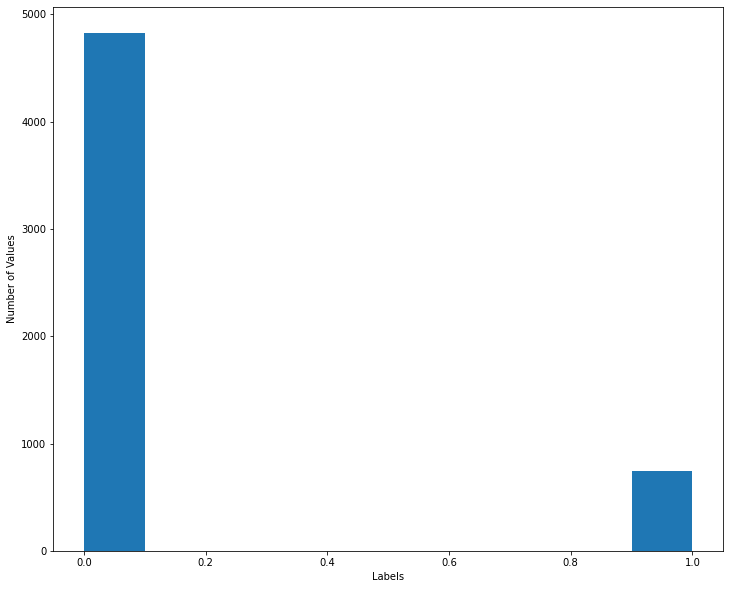

In [95]:
plt.figure(figsize=(12,10))
plt.hist(labels)
plt.xlabel('Labels')
plt.ylabel('Number of Values')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd2fff5dd8>]],
      dtype=object)

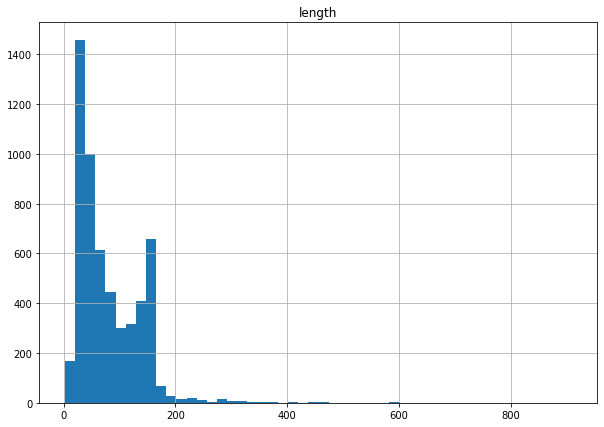

In [96]:
data['length'] = data['Message'].map(lambda x: len(x))
data.hist(column='length',bins=50, figsize=(10,7))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd2fee7278>,
      dtype=object)

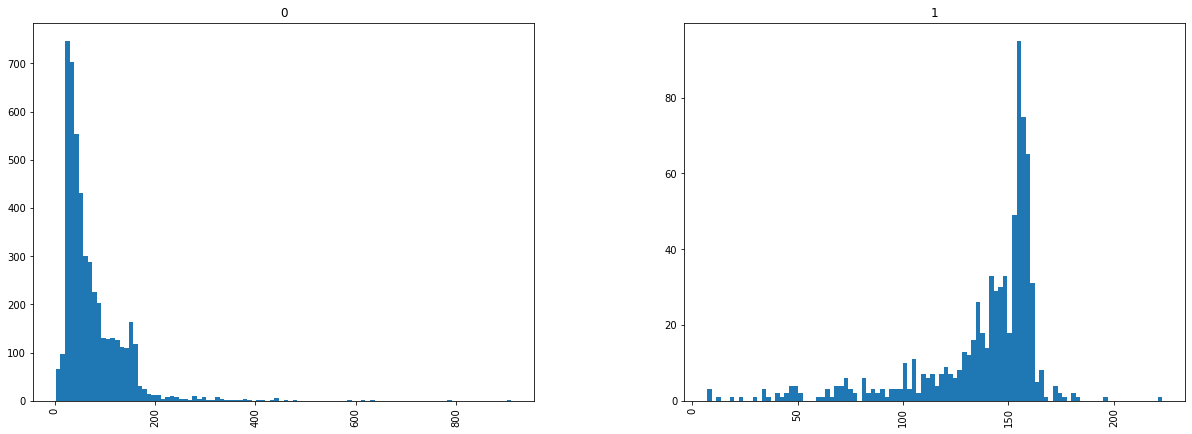

In [97]:
data.hist(column='length', by='Category', bins=100, figsize=(20,7))


As we can see label-0 has more values than label-1

In [109]:
data.drop('length',axis=1,inplace=True)
data.describe(include='all')

,Category,Message
count,5572.000000,5572
unique,NaN,5157
top,NaN,"Sorry, I'll call later"
freq,NaN,30
mean,0.134063,NaN
std,0.340751,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.000000,NaN
75%,0.000000,NaN


In [110]:
data.groupby('Category').describe()

Message                                                               
           count unique                                                top freq
Category                                                                       
0           4825   4516                             Sorry, I'll call later   30
1            747    641  Please call our customer service representativ...    4

## Now lets perform feature extraction on the text data

In [117]:
#Transforming features text into feature vectors and converting to lowercase
feature_ex=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
features=feature_ex.fit_transform(features)
labels=labels.astype("int")

In [121]:
features

<5572x8440 sparse matrix of type '<class 'numpy.float64'>'
	with 43529 stored elements in Compressed Sparse Row format>

### Now we will divide the dataset into train and test data

In [123]:
X_train,X_test,Y_train,Y_test=train_test_split(features,labels,test_size=0.2,random_state=1)

## SVM CLASSIFIER

In [125]:
svm=LinearSVC().fit(X_train,Y_train)

## Model Evaluation on test and train data

Making predctions

In [127]:
testpred_svm=svm.predict(X_test)
trainpred_svm=svm.predict(X_train)

Accuracy on Train and Test Data

In [128]:
print("Training accuracy of SVM: ",accuracy_score(Y_train,trainpred_svm))
print("Testing accuracy of SVM: ",accuracy_score(Y_test,testpred_svm))

Training accuracy of SVM:  0.9995512676688355
Testing accuracy of SVM:  0.9847533632286996


In [129]:
from sklearn.metrics import classification_report
classification_report(Y_test,testpred_svm)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       968\n           1       1.00      0.88      0.94       147\n\n    accuracy                           0.98      1115\n   macro avg       0.99      0.94      0.96      1115\nweighted avg       0.99      0.98      0.98      1115\n'

In [130]:
classification_report(Y_train,trainpred_svm)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3857\n           1       1.00      1.00      1.00       600\n\n    accuracy                           1.00      4457\n   macro avg       1.00      1.00      1.00      4457\nweighted avg       1.00      1.00      1.00      4457\n'

## Logistic Regression 

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
lr=LogisticRegression().fit(X_train,Y_train)

In [136]:
#Predictions
trainlr_pred=lr.predict(X_train)
testlr_pred=lr.predict(X_test)

In [138]:
#Accuracies
print("Training accuracy of Logistic Regression: ",accuracy_score(Y_train,trainlr_pred))
print("Testing accuracy of Logistic Regression: ",accuracy_score(Y_test,testlr_pred))

Training accuracy of Logistic Regression:  0.9676912721561588
Testing accuracy of Logistic Regression:  0.9614349775784753


## KNN Classifier

In [139]:
from sklearn.neighbors import KNeighborsClassifier


In [142]:
acc_lst=[]
for i in range(1,16):
  knn=KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
  pred_knn=knn.predict(X_test)
  acc_lst.append(accuracy_score(Y_test,pred_knn))
acc_lst=np.asarray(acc_lst)
print("Max accuracy {} found at K={}".format(acc_lst.max(),acc_lst.argmax()+1))
acc_lst

Max accuracy 0.9434977578475336 found at K=1


array([0.94349776, 0.91838565, 0.91838565, 0.9058296 , 0.9058296 ,
       0.89775785, 0.89775785, 0.88161435, 0.88161435, 0.87713004,
       0.87713004, 0.87085202, 0.87085202, 0.8690583 , 0.8690583 ])

## Random Forest Classifier




In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
Rf=RandomForestClassifier().fit(X_train,Y_train)
trainpred_rf=Rf.predict(X_train)
testpred_rf=Rf.predict(X_test)

In [145]:
print("Training accuracy of Random Forest Classifier: ",accuracy_score(Y_train,trainpred_rf))
print("Testing accuracy of Random Forest Classifier: ",accuracy_score(Y_test,testpred_rf))

Training accuracy of Random Forest Classifier:  1.0
Testing accuracy of Random Forest Classifier:  0.9829596412556054


In [181]:
new=pd.DataFrame()

In [182]:
new["Random Forest"]=[accuracy_score(Y_test,testpred_rf)]
new["SVM"]=[accuracy_score(Y_test,testpred_svm)]
new["Logistic Regression"]=[accuracy_score(Y_test,testlr_pred)]

In [183]:
new.head()

,Random Forest,SVM,Logistic Regression
0,0.98296,0.984753,0.961435


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd2cfb9d30>,
      dtype=object)

<Figure size 1152x864 with 0 Axes>

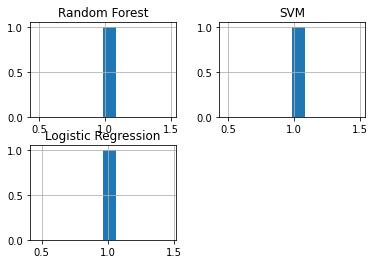

In [190]:
plt.figure(figsize=(16,12))
new.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


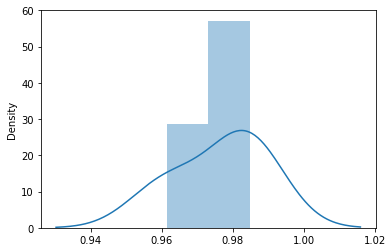

In [186]:
sns.distplot(new)

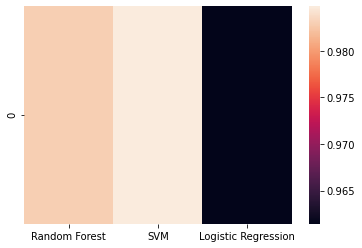

In [187]:
sns.heatmap(new)

# Conclusion: SVM has performed the best 